In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import tree

import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('wine.csv')

In [20]:
# Розділення датасету на вхідні змінні та вихідну змінну
X = dataset.drop('quality', axis=1)
y = dataset['quality']

# Розділення датасету на тренувальний та тестувальний набори даних
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Створення та навчання моделі логістичної регресії
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Прогнозування на тестових даних
y_pred = log_reg.predict(X_test)

d:\study\coursea4\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
# Оцінка результатів
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[104  37]
 [ 45 134]]
              precision    recall  f1-score   support

         bad       0.70      0.74      0.72       141
        good       0.78      0.75      0.77       179

    accuracy                           0.74       320
   macro avg       0.74      0.74      0.74       320
weighted avg       0.75      0.74      0.74       320



Decisions tree

In [23]:
# Створення та навчання моделі дерева рішень
dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train, y_train)

# Прогнозування на тестових даних
y_pred = dec_tree.predict(X_test)

In [24]:
# Оцінка результатів
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 96  45]
 [ 49 130]]
              precision    recall  f1-score   support

         bad       0.66      0.68      0.67       141
        good       0.74      0.73      0.73       179

    accuracy                           0.71       320
   macro avg       0.70      0.70      0.70       320
weighted avg       0.71      0.71      0.71       320



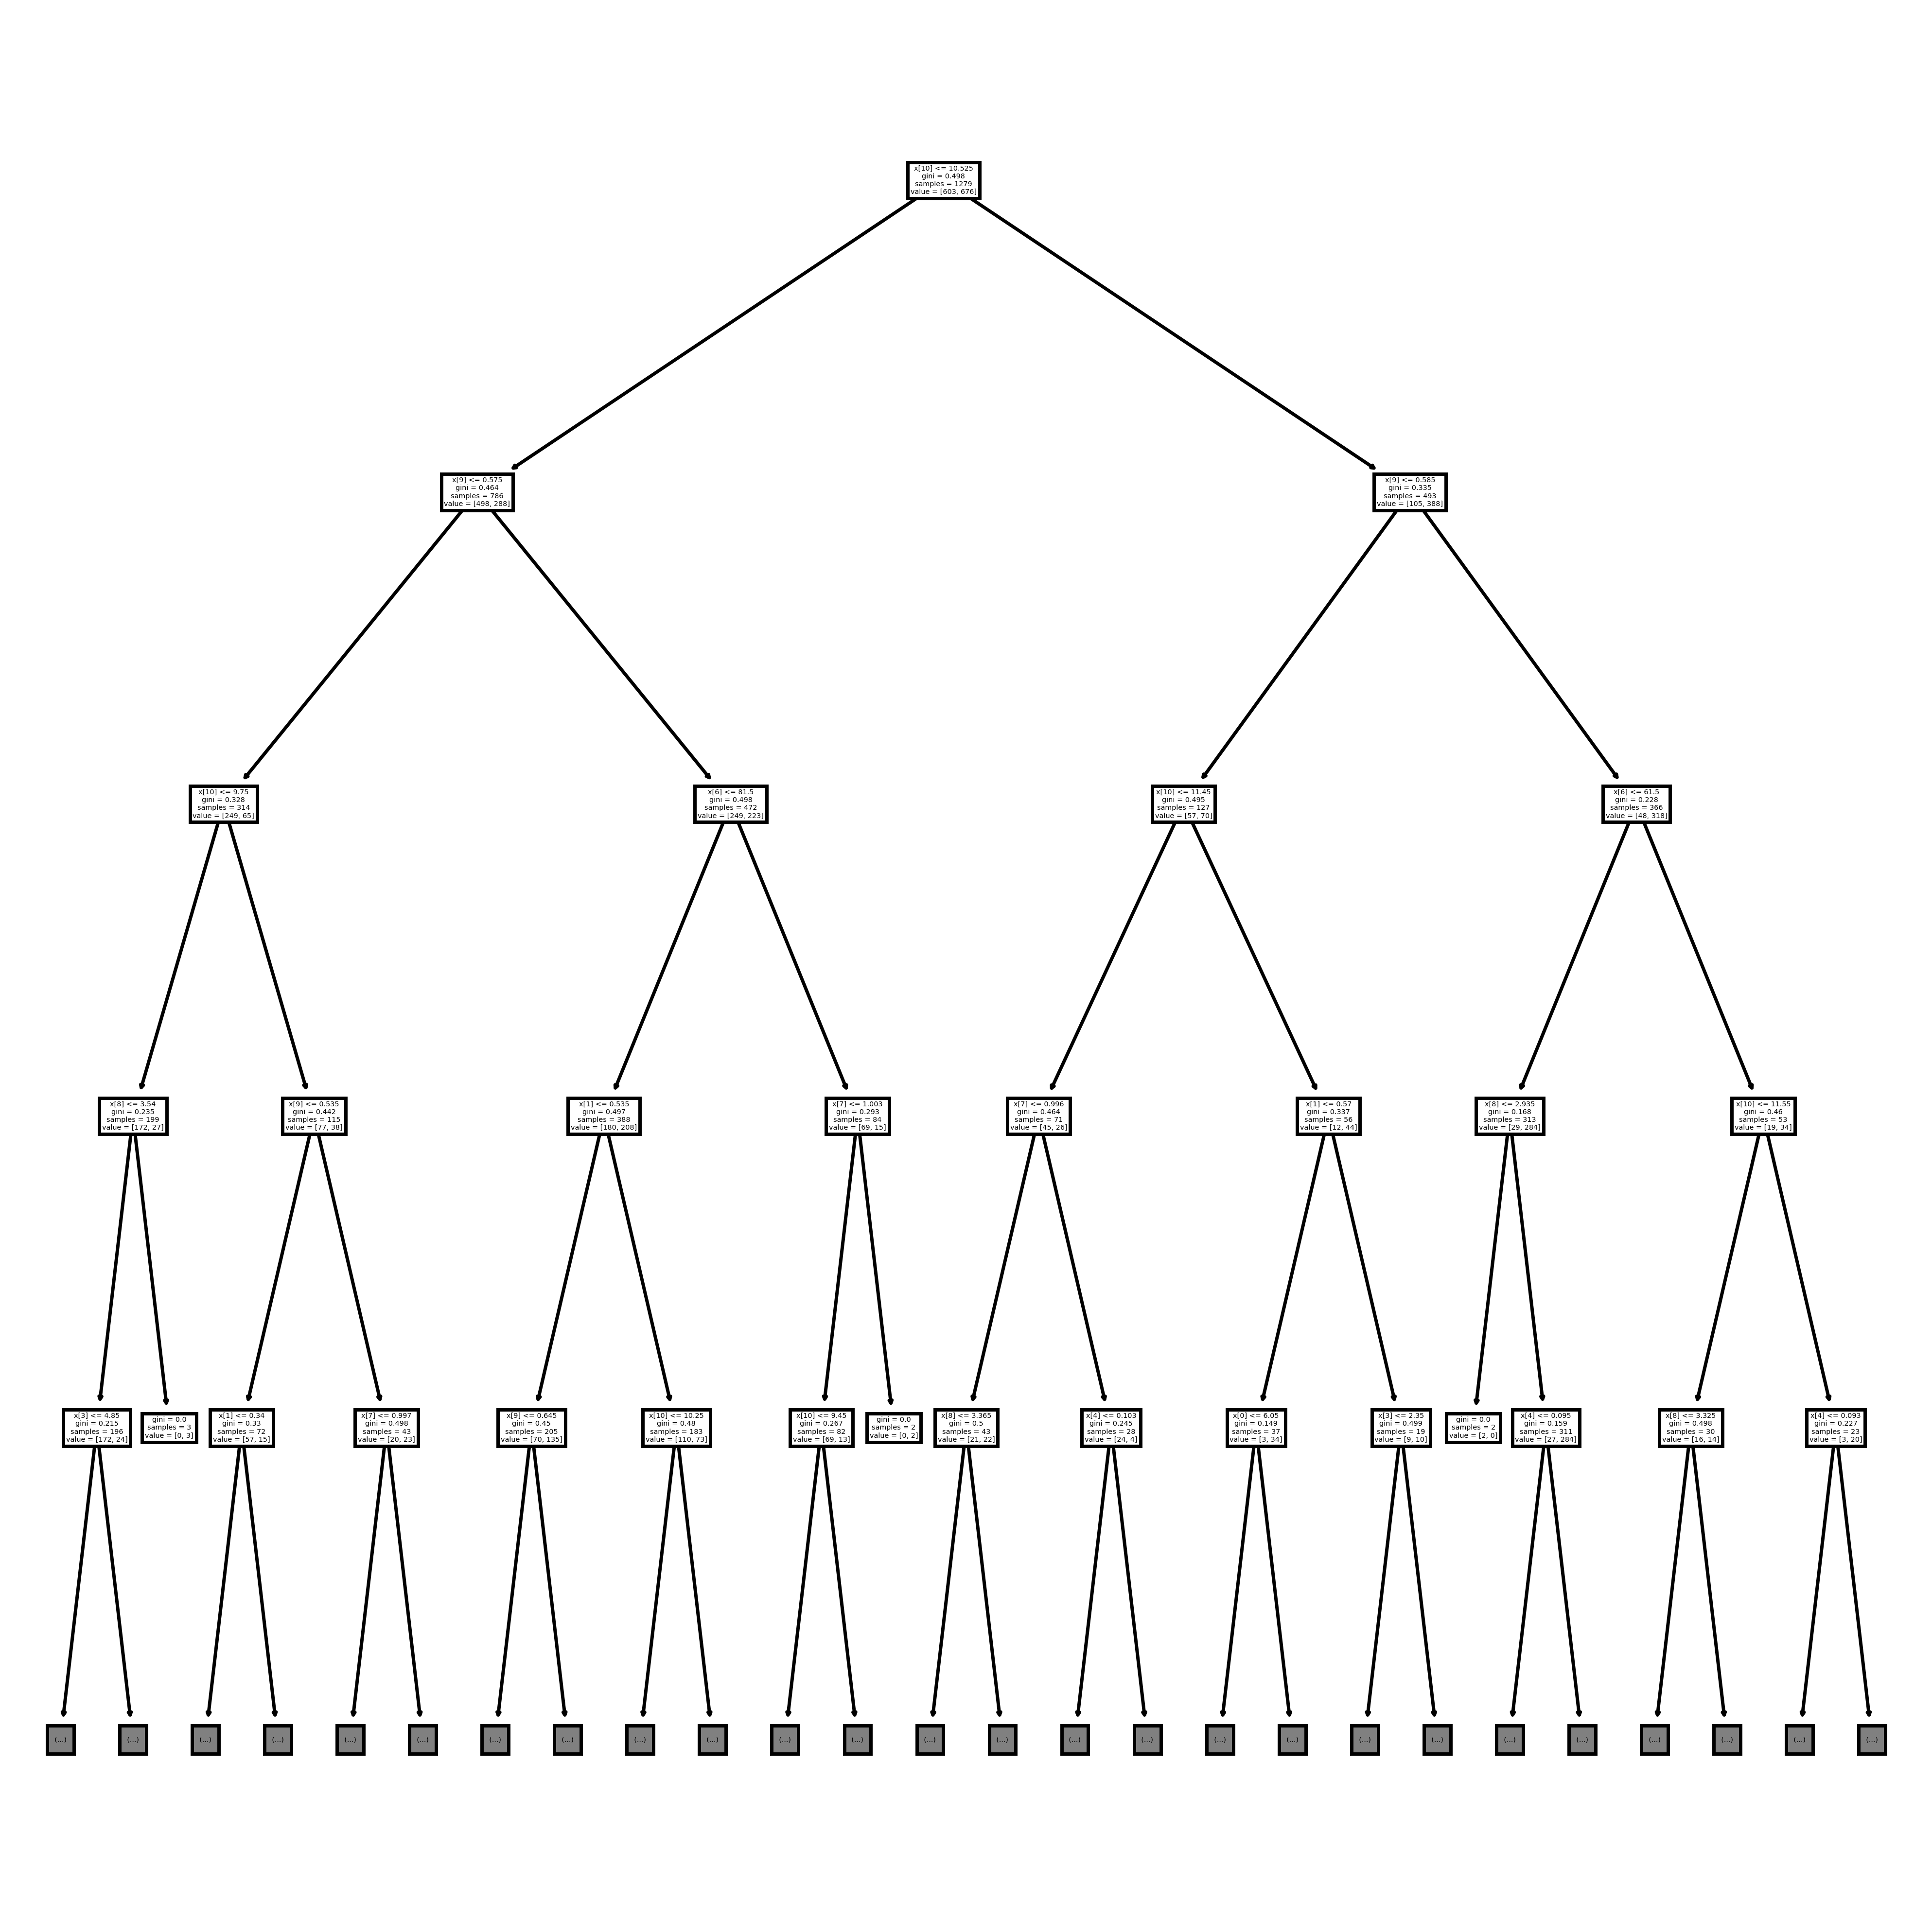

In [29]:
# Візуалізація дерева рішень
fig, ax = plt.subplots(figsize=(10, 10), dpi=500)
tree.plot_tree(dec_tree, ax=ax, max_depth=4)
plt.show()